In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.table as at
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_confusion_matrix, roc_auc_score

## Machine learning part
Sihan Li

In [2]:
data_1818 = pd.read_csv('/Users/siriuslee/Documents/GitHub/ast596fds-final/sunspot_data/SILSO_daily_1818.csv', delimiter=';')
data_1818.columns = ['Year','Month','Day','Decimal year','SSN','std','observations','Definitive indicator']
data_1818

,Year,Month,Day,Decimal year,SSN,std,observations,Definitive indicator
0,1818,1,2,1818.004,-1,-1.0,0,1
1,1818,1,3,1818.007,-1,-1.0,0,1
2,1818,1,4,1818.010,-1,-1.0,0,1
3,1818,1,5,1818.012,-1,-1.0,0,1
4,1818,1,6,1818.015,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
73864,2020,3,27,2020.236,0,0.0,43,0
73865,2020,3,28,2020.239,0,0.0,39,0
73866,2020,3,29,2020.242,0,0.0,36,0
73867,2020,3,30,2020.245,4,0.2,9,0


In [3]:
# clean the SSN data
data_cleaned = data_1818[data_1818['SSN'] != -1]
data_cleaned

,Year,Month,Day,Decimal year,SSN,std,observations,Definitive indicator
6,1818,1,8,1818.021,65,10.2,1,1
11,1818,1,13,1818.034,37,7.7,1,1
15,1818,1,17,1818.045,77,11.1,1,1
16,1818,1,18,1818.048,98,12.6,1,1
17,1818,1,19,1818.051,105,13.0,1,1
...,...,...,...,...,...,...,...,...
73864,2020,3,27,2020.236,0,0.0,43,0
73865,2020,3,28,2020.239,0,0.0,39,0
73866,2020,3,29,2020.242,0,0.0,36,0
73867,2020,3,30,2020.245,4,0.2,9,0


In [4]:
t = np.array(data_cleaned['Decimal year'])
y = np.array(data_cleaned['SSN'])

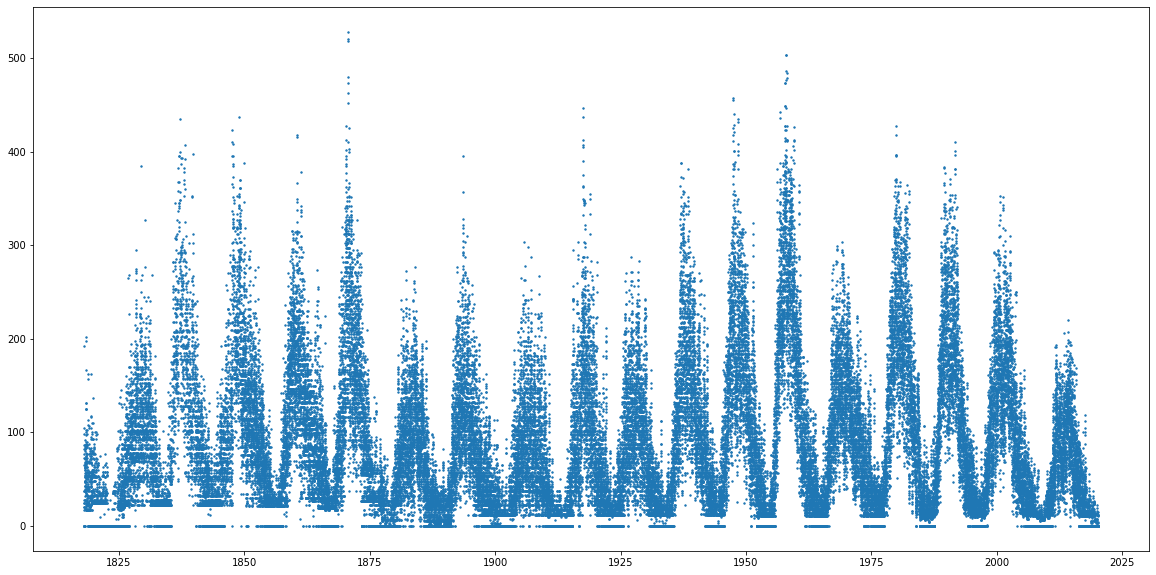

In [6]:
# X = np.array(data_cleaned)
plt.figure(figsize=(20,10))
# n2 = np.arange(len(t))
plt.scatter(t, y, s=2)

In [7]:
n = np.arange(len(t))
X = np.append([t], [y], axis=0)
X = X.T

enc = LabelEncoder()
y = enc.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

print(y_test)
y_test.astype(float)
y_train.astype(float)
# t_train, t_test, y_train, y_test = train_test_split(t, y, random_state=15)

# scaler = MinMaxScaler()
# t_train = scaler.fit_transform(t_train)

# t_test = scaler.transform(t_test)

[ 98  23  97 ... 144  22 163]


array([ 62.,  30.,  93., ...,  20., 167., 114.])

In [9]:
knn = kNN(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


rf = RandomForestClassifier(n_estimators=10, max_depth=2, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

lda = LDA()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))


knn2 = kNN(n_neighbors=30)
knn2.fit(X_train, y_train)

print('Accuracy of KNN classifier on training set w/ 30 neighbors: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set w/ 30 neighbors: {:.2f}'
     .format(knn2.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.97
Accuracy of KNN classifier on test set: 0.91
Accuracy of RF classifier on training set: 0.01
Accuracy of RF classifier on test set: 0.01
Accuracy of LDA classifier on training set: 0.16
Accuracy of LDA classifier on test set: 0.16
Accuracy of KNN classifier on training set w/ 30 neighbors: 0.64
Accuracy of KNN classifier on test set w/ 30 neighbors: 0.58


In [22]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# lb.fit(y_test)
# y_test = lb.transform(y_test)
# y_train = lb.transform(y_train)

y_score_knn = knn.predict_proba(X_test)[:,1]
print(y_score_knn)
print(y_score_knn.shape)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_score_knn, pos_label=lb)

y_score_rf = rf.predict_proba(X_test)[:,1]
print(y_score_rf)
print(y_score_rf.shape)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

y_score_lda = lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_score_lda)

y_score_knn2 = knn2.predict_proba(X_test)[:,1]
fpr_knn2, tpr_knn2, _ = roc_curve(y_test, y_score_knn2)

plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='C0', lw=lw, label='kNN w/ 3 neighbors')
plt.plot(fpr_rf, tpr_rf, color='C1', lw=lw, label='RF (deliberately crap)')
plt.plot(fpr_lda, tpr_lda, color='C2', lw=lw, label='LDA')
plt.plot(fpr_knn2, tpr_knn2, color='C3', lw=lw, label='kNN w/ 30 neighbors')

plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[0. 0. 0. ... 0. 0. 0.]
(23306,)


ValueError: multilabel-indicator format is not supported